## The Curse of Dimensionality

Generally, real world datasets contain thousands or millions of features to train for. It is very time consuming task as this makes training extremely slow. In such cases, it is very difficult to find a good solution. This problem is often referred to as the curse of dimensionality.

**The curse of dimensionality** refers to various phenomena that arise when we analyze and organize data in high dimensional spaces (often with hundreds or thousands of dimensions) that do not occur in low-dimensional settings. The problem is that when the dimensionality increases, the volume of the space increases so fast that the available data become sparse. This sparsity is problematic for any method that requires statistical significance.

In real-world problems, it is often possible to reduce the number of dimensions considerably. This process is called **dimensionality reduction**. It refers to the process of reducing the number of dimensions under consideration by obtaining a set of principal variables. It helps to speed up training and is also extremely useful for data visualization.

The most popular dimensionality reduction technique is Principal Component Analysis (PCA), which is discussed below.

## Introduction to Principal Component Analysis (PCA)


**Principal Component Analysis (PCA)** is a dimensionality reduction technique that can be used to reduce a larger set of feature variables into a smaller set that still contains most of the variance in the larger set. 
- `Preserve the variance ->` PCA, first identifies the hyperplane that lies closest to the data and then it projects the data onto it. Before, we can project the training set onto a lower-dimensional hyperplane, we need to select the right hyperplane. The projection can be done in such a way so as to preserve the maximum variance. This is the idea behind PCA.

- `Principal Components ->` PCA identifies the axes that accounts for the maximum amount of cumulative sum of variance in the training set. These are called Principal Components. PCA assumes that the dataset is centered around the origin. Scikit-Learn’s PCA classes take care of centering the data automatically.

- `Projecting down to d Dimensions->` Once, we have identified all the principal components, we can reduce the dimensionality of the dataset down to d dimensions by projecting it onto the hyperplane defined by the first d principal components. This ensures that the projection will preserve as much variance as possible.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv(r"C:\Users\TharunMahendra\NIT\6.Algorithms\2.Classification\adult.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# checking ?  values
data.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [6]:
# converting ? to NaN
data.replace('?', np.nan, inplace=True)

In [7]:
data.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [9]:
for col in ['workclass', 'occupation', 'native.country']:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [10]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Divide into Dependent & Independent Variables

In [11]:
x=data.drop(['income'],axis=1)
y=data['income']

In [12]:
x.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

#### Label Encoder & Feature Scaling

In [14]:
from sklearn import preprocessing
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
    encoder=preprocessing.LabelEncoder()
    x_train[feature]=encoder.fit_transform(x_train[feature])
    x_test[feature]=encoder.fit_transform(x_test[feature])

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=pd.DataFrame(scaler.fit_transform(x_train),columns=x.columns)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x.columns)

In [16]:
x_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.600478,-1.494279,-0.332263,1.133894,-0.402341,-0.782234,2.214196,0.39298,-1.430470,-0.145189,-0.217407,-1.662414,0.262317
1,0.028248,-1.884720,0.438778,0.184396,-0.423425,-0.402341,-0.026696,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.200753,0.262317
2,0.247956,-0.090641,0.045292,1.217715,-0.034095,0.926666,-0.782234,-0.276689,0.39298,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
3,-0.850587,-1.884720,0.793152,0.184396,-0.423425,0.926666,-0.530388,0.968753,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,-0.044989,-2.781760,-0.853275,0.442726,1.523223,-0.402341,-0.782234,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317


#### Logistic Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [18]:
accuracy_of_all_variables=accuracy_score(y_test,y_pred)
accuracy_of_all_variables

0.8216808271061521

#### Logistic Regression with PCA
##### Explained Variance Ratio

A very useful piece of information is the **explained variance ratio** of each principal component. It is available via the `explained_variance_ratio_ ` variable. It indicates the proportion of the dataset’s variance that lies along the axis of each principal component.

Now, let's get to the PCA implementation.

In [19]:
from sklearn.decomposition import PCA
pca=PCA()
x_train=pca.fit_transform(x_train)

In [20]:
x_train

array([[ 1.74453448,  1.44372786, -2.16422698, ..., -0.49169461,
         1.48505183,  0.73865204],
       [-0.62223658, -0.49117863,  0.13352266, ..., -0.38769783,
        -0.33189103, -0.18923337],
       [ 0.64701057,  1.08115659, -0.39157213, ...,  1.03646263,
        -0.66666823, -1.01692683],
       ...,
       [ 0.81413697, -1.67337571,  0.77139075, ...,  0.04683507,
         0.3862579 ,  0.37862524],
       [-1.46535949,  0.93546551, -0.39705611, ..., -0.0545075 ,
         1.02553564,  0.04871497],
       [-0.9935644 , -0.36895764, -0.17597071, ..., -0.46921897,
        -0.22508863, -0.23866049]])

In [21]:
pca.explained_variance_ratio_

array([0.14757168, 0.10182915, 0.08147199, 0.07880174, 0.07463545,
       0.07274281, 0.07009602, 0.06750902, 0.0647268 , 0.06131155,
       0.06084207, 0.04839584, 0.04265038, 0.02741548])

- We can see that approximately 97.25% of variance is explained by the first 13 variables. 

- Only 2.75% of variance is explained by the last variable. So, we can assume that it carries little information. 

- So, We will drop it, train the model again and calculate the accuracy. 

In [22]:
x = data.drop(['income','native.country'], axis=1)
y = data['income']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Label Encoder
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        encoder = preprocessing.LabelEncoder()
        x_train[feature] = encoder.fit_transform(x_train[feature])
        x_test[feature] = encoder.transform(x_test[feature])

# Feature Scaling
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)


model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('Logistic Regression accuracy score with all Variables: {0:0.4f}'. format(accuracy_of_all_variables))
print('Logistic Regression accuracy score with the first 13 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all Variables: 0.8217
Logistic Regression accuracy score with the first 13 features: 0.8213



- We can see that accuracy has been decreased  after dropping the last feature.

- Now, if We take the last two features combined, then we can see that approximately 7% of variance is explained by them.

- We will drop them, train the model again and calculate the accuracy.

In [23]:
x = data.drop(['income','native.country','hours.per.week'], axis=1)
y = data['income']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Label Encoder
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        encoder = preprocessing.LabelEncoder()
        x_train[feature] = encoder.fit_transform(x_train[feature])
        x_test[feature] = encoder.transform(x_test[feature])

# Feature Scaling
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)


model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('Logistic Regression accuracy score with all Variables: {0:0.4f}'. format(accuracy_of_all_variables))
print('Logistic Regression accuracy score with the first 12 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all Variables: 0.8217
Logistic Regression accuracy score with the first 12 features: 0.8227



- Now, we can be see that the accuracy has been increased, if the model is trained with 12 features.

- Lastly, We will take the last three features combined. Approximately 11.83% of variance is explained by them.

- We will repeat the process, drop these features, train the model again and calculate the accuracy.


In [24]:
x = data.drop(['income','native.country','hours.per.week','capital.loss'], axis=1)
y = data['income']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Label Encoder
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        encoder = preprocessing.LabelEncoder()
        x_train[feature] = encoder.fit_transform(x_train[feature])
        x_test[feature] = encoder.transform(x_test[feature])

# Feature Scaling
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)


model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('Logistic Regression accuracy score with all Variables: {0:0.4f}'. format(accuracy_of_all_variables))
print('Logistic Regression accuracy score with the first 11 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all Variables: 0.8217
Logistic Regression accuracy score with the first 11 features: 0.8186



- We can see that accuracy has significantly decreased  if we drop the last three features.

- Our aim is to maximize the accuracy. We get maximum accuracy with the first 12 features.

#### Select right number of dimensions

- The above process works well if the number of dimensions are small.

- But, it is quite repeating`` if we have large number of dimensions.

- In that case, a better approach is to compute the number of dimensions that can explain significantly large portion of the variance.

- The following code computes PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 90% of the training set variance.

In [25]:
x = data.drop(['income'], axis=1)
y = data['income']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Label Encoder
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        encoder = preprocessing.LabelEncoder()
        x_train[feature] = encoder.fit_transform(x_train[feature])
        x_test[feature] = encoder.transform(x_test[feature])

# Feature Scaling
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)

pca.fit(x_train)
cumsum=np.cumsum(pca.explained_variance_ratio_)
dimensions=np.argmax(cumsum>=0.90)+1
print('The number of dimensions required to preserve 90% of variance is',dimensions)

The number of dimensions required to preserve 90% of variance is 12


Text(0.5, 0, 'Dimensions')

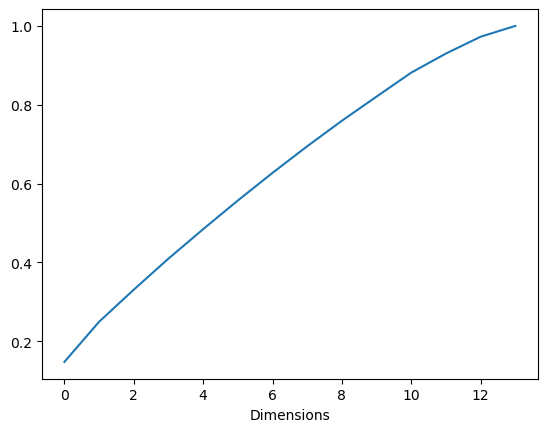

In [26]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Dimensions')